# Data Analysis MER Station

### 1. Data Import

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
#Load dataset
df =pd.read_csv('mer_imputed_merged_data.csv')
df.head()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


### 2. Descriptive Statistics

In [108]:
summary = df.describe()
print(summary)

       direct_radiation (W/m²)      PM25_MER      PM10_MER       SO2_MER  \
count             26788.000000  26788.000000  26788.000000  26788.000000   
mean                198.299313     21.938476     39.138806      3.653750   
std                 285.059521     12.670387     20.382502      5.767726   
min                   0.000000      1.000000      2.000000      0.000000   
25%                   0.000000     13.000000     24.000000      1.000000   
50%                   2.000000     20.000000     36.000000      2.000000   
75%                 383.000000     29.000000     51.000000      4.000000   
max                1008.000000    186.000000    411.000000    251.000000   

             O3_MER       NO2_MER        CO_MER        RH_MER       TMP_MER  \
count  26788.000000  26788.000000  26788.000000  26788.000000  26788.000000   
mean      25.629505     30.601047      0.505975     49.909788     18.849627   
std       26.409113     13.298383      0.382489     19.936643      4.285339   

In [109]:
print(df.dtypes)

datetime                    object
direct_radiation (W/m²)      int64
PM25_MER                   float64
PM10_MER                   float64
SO2_MER                    float64
O3_MER                     float64
NO2_MER                    float64
CO_MER                     float64
RH_MER                     float64
TMP_MER                    float64
WDR_MER                    float64
WSP_MER                    float64
is_festival                  int64
is_weekend                   int64
AirQualityIndex              int64
dtype: object


#### Frequency and Count Analysis
- Frequency and count analysis is essential for understanding the distribution and occurrence of values in a dataset, particularly for categorical variables and time-based data. This step helps to identify patterns, anomalies, and potential areas of interest. It provides a clear view of how frequent each value appears in a dataset, also identifies recurring patterns for time periods.


**Frequency and Count Analysis for Categorical Data (is_festival, is_weekend)**

#### For "is_festival"

is_festival
0    25442
1     1346
Name: count, dtype: int64


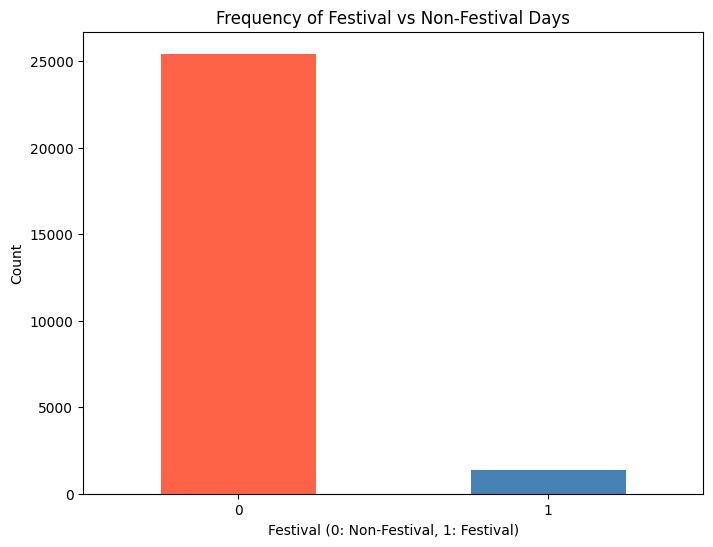

In [110]:
#Categorical Data "is_festival"
festival_counts = df['is_festival'].value_counts()
print(festival_counts)
festival_counts.plot(kind='bar', figsize=(8, 6), color=['#FF6347', '#4682B4'])
plt.title('Frequency of Festival vs Non-Festival Days')
plt.xlabel('Festival (0: Non-Festival, 1: Festival)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar plot visualizes the frequency of festival and non-festival days in the dataset. The is_festival column is a binary variable, where:
- 0 represents Non-Festival days.
- 1 represents Festival days.
The bar plot reflects this imbalance, with the Non-Festival bar being much taller than the Festival bar, indicating that festival days occur much less frequently in the data compared to non-festival days. 

**Compare Pollution Levels for "is_festival"** 

In [111]:
#Group pollutants data by is_festival
df_festival = df.groupby('is_festival')[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']]

In [112]:
#Mean of grouped data 
df_festival_mean= df_festival.mean()
df_festival_mean

,PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER
is_festival,,,,,,
0,21.673872,38.877110,3.632372,25.556128,30.652662,0.506514
1,26.939992,44.085369,4.057841,27.016469,29.625433,0.495779


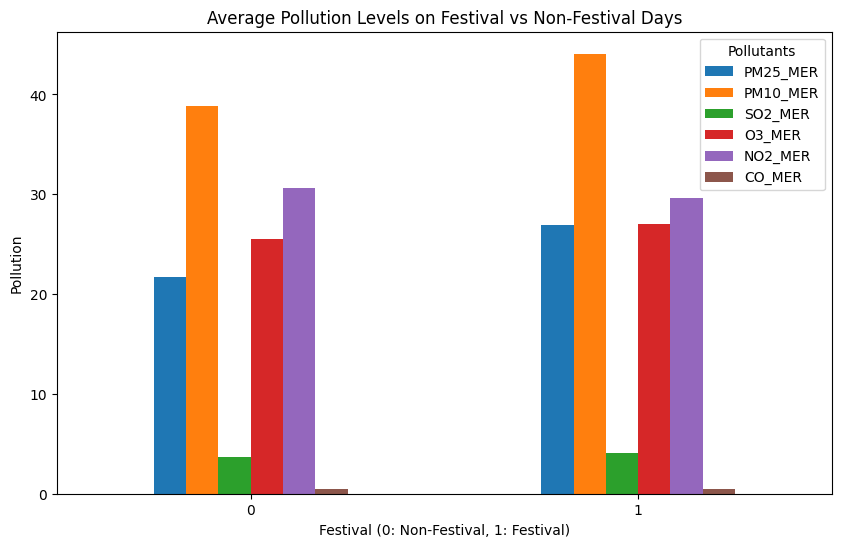

In [113]:
# Plotting the comparison
df_festival_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pollution Levels on Festival vs Non-Festival Days')
plt.ylabel('Pollution')
plt.xlabel('Festival (0: Non-Festival, 1: Festival)')
plt.xticks(rotation=0)
plt.legend(title='Pollutants')
plt.show()

In this analysis, we are comparing the average pollution levels for each pollutant (PM2.5, PM10, SO2, O3, NO2, CO) between Festival days (1) and Non-Festival days (0).

**Analysis from the Plot:**
- This analysis shows that festival days tend to have higher pollution levels for some pollutants (especially particulate matter like PM2.5 and PM10), while non-festival days exhibit higher levels of NO2. Referring to these trends can help in planning air quality management and mitigation strategies, especially around festival times.

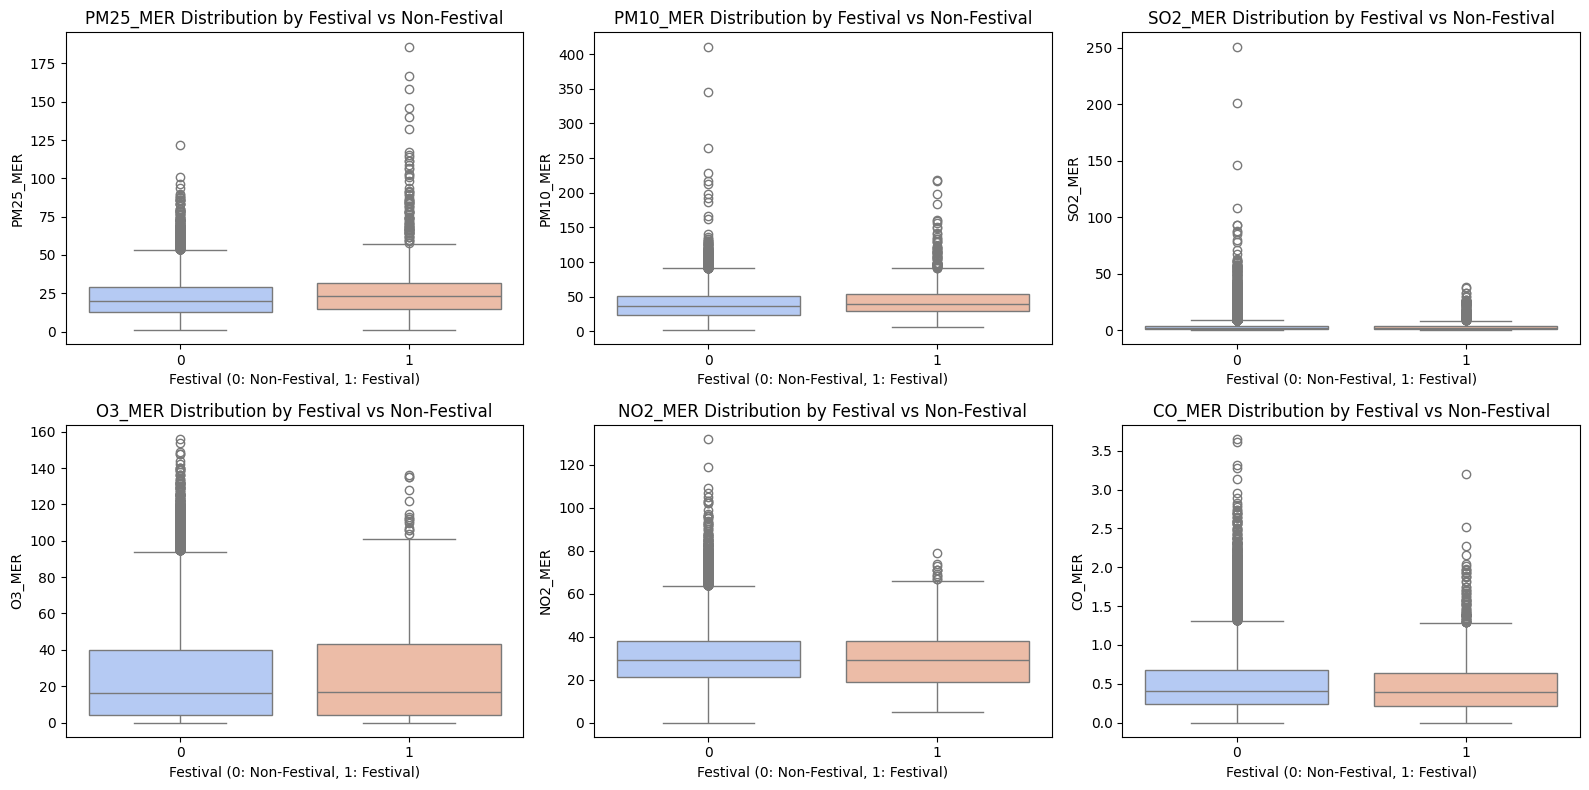

In [114]:
#Boxplot for Comparision
import seaborn as sns

# Plot boxplots to compare pollution levels between festival and non-festival days
plt.figure(figsize=(16, 8))
pollutants = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_festival', y=pollutant, data=df, hue='is_festival', palette='coolwarm', legend=False)
    plt.title(f'{pollutant} Distribution by Festival vs Non-Festival')
    plt.xlabel('Festival (0: Non-Festival, 1: Festival)')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

The boxplots above further confirm the findings mentioned earlier by visualizing the distribution and spread of each pollutant across festival and non-festival days.
**Analysis**
- The median pollution level for PM2.5 is slightly higher on festival days compared to non-festival days. The IQR is slightly wider during festival days. PM10 levels are significantly higher on festival days.
- Both PM2.5 and PM10 exhibit higher levels during festival days, with a wider range and more extreme outliers.
- SO2 levels show minimal difference between festival and non-festival days in terms of median and IQR. Outliers are present on both days, but festival days have slightly more extreme outliers.
- O3 levels appear relatively consistent between festival and non-festival days. The medians and IQRs for both categories are similar and outliers are present on both types of days but are comparable in frequency and magnitude.
- NO2 levels are slightly lower on festival days compared to non-festival days, as seen from the slightly lower median on festival days wehereas outliers are more frequent on festival days.
- CO levels are relatively stable across both festival and non-festival days. The medians and IQRs are almost identical and outliers are present but show no significant difference between the two categories.



#### For "is_weekend"

is_weekend
0    19154
1     7634
Name: count, dtype: int64


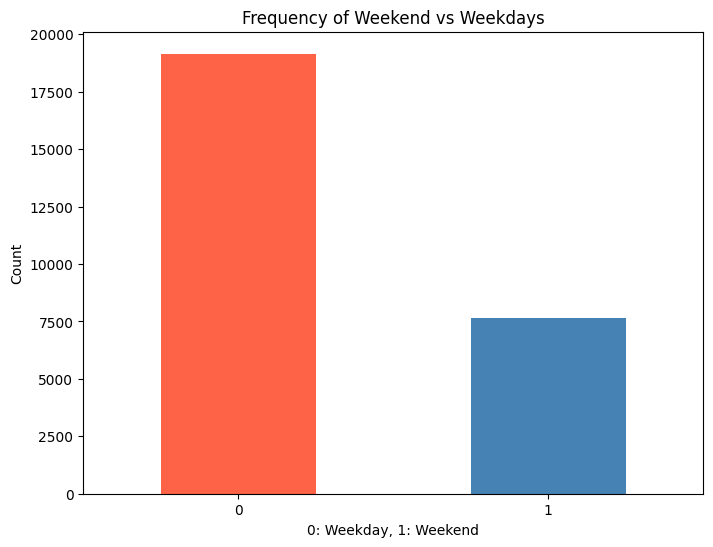

In [115]:
#Categorical Data "is_weekend"
weekend_counts = df['is_weekend'].value_counts()
print(weekend_counts)
weekend_counts.plot(kind='bar', figsize=(8, 6), color=['#FF6347', '#4682B4'])
plt.title('Frequency of Weekend vs Weekdays')
plt.xlabel('0: Weekday, 1: Weekend')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar plot visualizes the frequency of weekend and weekdays in the dataset. The is_weekend column is a binary variable, where:
- 0 represents Weekdays.
- 1 represents Weekend.

The bar plot shows that the dataset contains significantly more Weekdays than Weekend days, with the Weekdays bar being much taller than the Weekend bar. It provides a basis for exploring how various pollutants behave on weekends as compared to regular weekdays, which may be useful for air quality management and mitigation strategies.

**Compare Pollution Levels for "is_weekend"** 

In [116]:
#Group pollutants data by is_weekend
df_weekend = df.groupby('is_weekend')[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']]

In [117]:
#Mean of grouped data 
df_weekend_mean= df_weekend.mean()
df_weekend_mean

,PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER
is_weekend,,,,,,
0,21.879311,39.461512,3.554284,25.019209,31.517288,0.526471
1,22.086922,38.329127,3.903314,27.160760,28.302164,0.454547


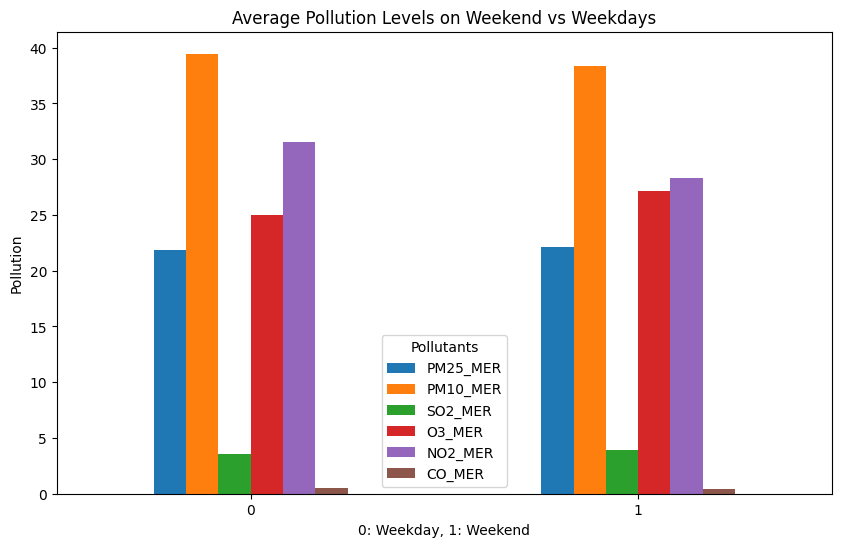

In [118]:
# Plotting the comparison
df_weekend_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Average Pollution Levels on Weekend vs Weekdays')
plt.ylabel('Pollution')
plt.xlabel('0: Weekday, 1: Weekend')
plt.xticks(rotation=0)
plt.legend(title='Pollutants')
plt.show()

The bar plot compares the average pollution levels for each pollutant on Weekdays (0) and Weekend days (1), providing insight into how pollution levels vary between these two types of days.

**Analysis from the Plot:**

- PM2.5 and PM10 levels are quite similar on both weekends and weekdays, but slightly higher on weekends.
- SO2 levels are higher on weekends, suggesting that certain activities on weekends might lead to more sulfur dioxide emissions.
- O3 levels are higher on weekends while NO2 levels are higher on weekdays.
- CO levels are slightly higher on weekdays, but the difference is small.


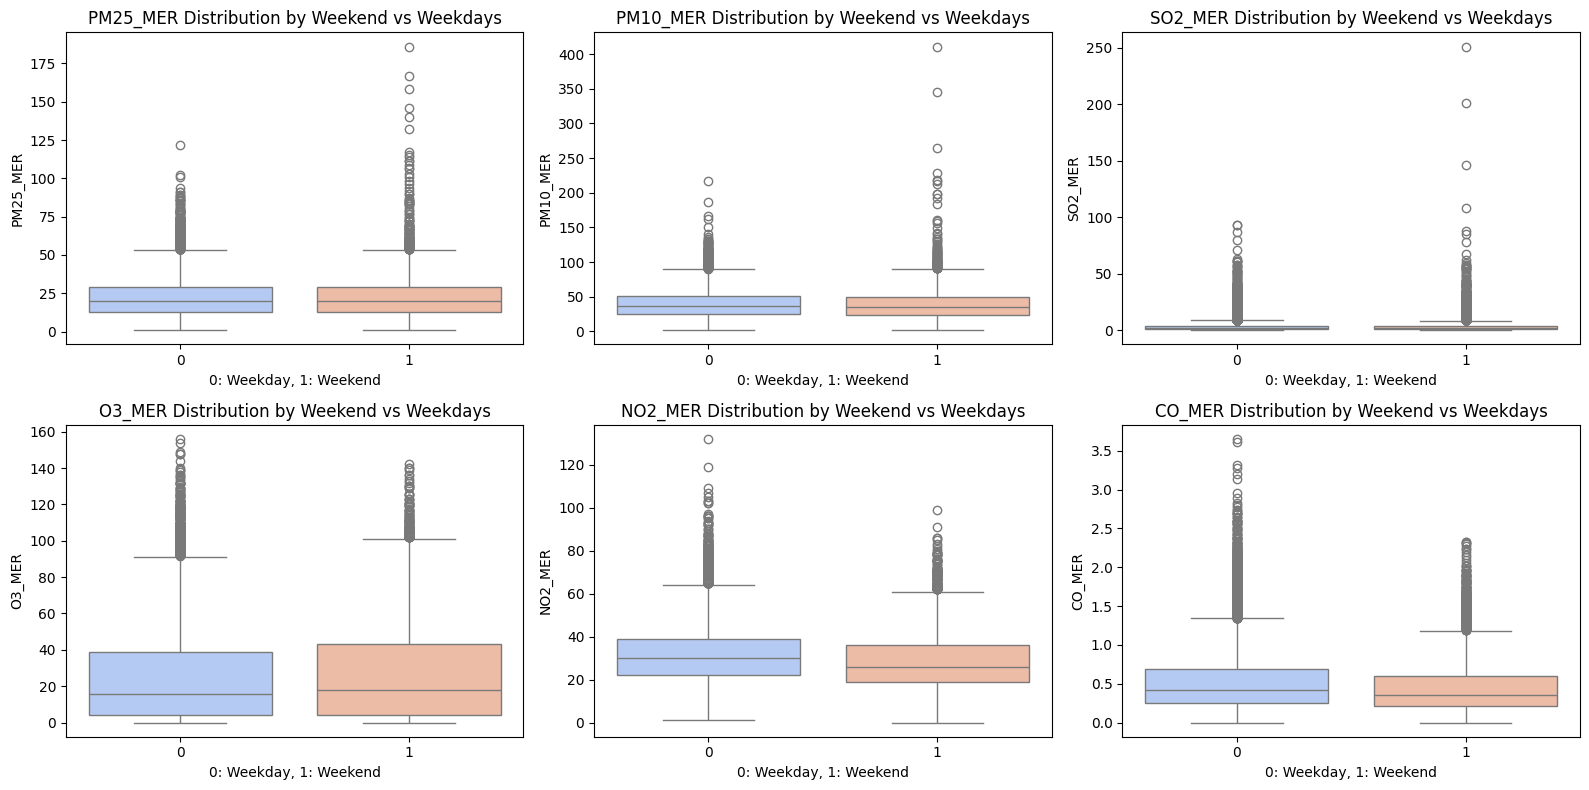

In [119]:
#Boxplot for Comparision
import seaborn as sns

# Plot boxplots to compare pollution levels between weekends and weekdays
plt.figure(figsize=(16, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_weekend', y=pollutant, data=df, hue='is_weekend', palette='coolwarm', legend=False)
    plt.title(f'{pollutant} Distribution by Weekend vs Weekdays')
    plt.xlabel('0: Weekday, 1: Weekend')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

These boxplots allow us to see the distribution of pollutants across weekends and weekdays, helping us to better understand how pollution levels fluctuate depending on the day of the week. From the boxplots, we can conclude that weekends tend to have slightly higher pollution levels for some pollutants, while others (like NO2) show higher levels on weekdays. Also, the following analysis can be made:

**Analysis**
- The median PM2.5 levels are slightly higher on weekends compared to weekdays while the interquartile range (IQR) and overall spread of PM2.5 values are similar for both weekdays and weekends. Outliers are present on both categories, with slightly more extreme outliers on weekends.
- PM10 levels show a similar trend as PM2.5, with slightly higher medians on weekends. The distribution indicates a broader range of values on weekends, and outliers are more frequent and extreme.
- SO2 levels have a higher median and IQR and presence of more extreme outliers on weekends.
- O3 levels are notably higher on weekends, with a higher median and broader IQR compared to weekdays.
- NO2 levels are higher on weekdays, with a higher median and IQR compared to weekends. Fewer outliers on weekends suggest more stable NO2 levels during these days.
- CO levels show slightly higher medians on weekdays, but the difference is minimal. The IQR and overall spread of CO values are similar for weekdays and weekends. Outliers are present in both categories, with no significant difference in frequency or magnitude.

**Frequency and Count Analysis for Time Periods**

In [120]:
# Frequency counts for time periods
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['day_of_week'] = pd.to_datetime(df['datetime']).dt.day_name()
df['month'] = pd.to_datetime(df['datetime']).dt.month

hour
0     1120
1     1116
2     1116
3     1116
4     1116
5     1116
6     1116
7     1116
8     1116
9     1116
10    1116
11    1116
12    1116
13    1116
14    1116
15    1116
16    1116
17    1116
18    1116
19    1116
20    1116
21    1116
22    1116
23    1116
Name: count, dtype: int64


<Axes: title={'center': 'Frequency by Hour'}, xlabel='hour'>

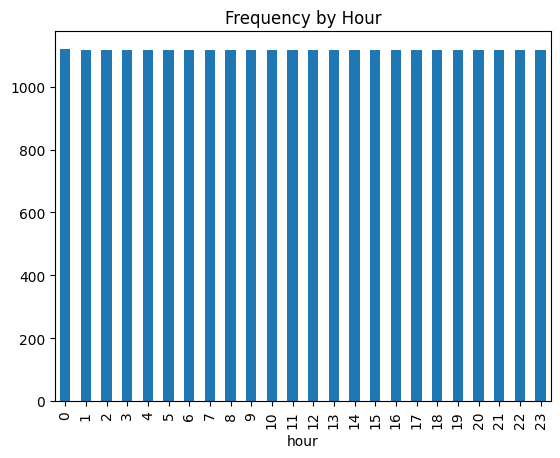

In [121]:
#By Hour
hour_counts = df['hour'].value_counts().sort_index()
print(hour_counts)
hour_counts.plot(kind='bar', title='Frequency by Hour')

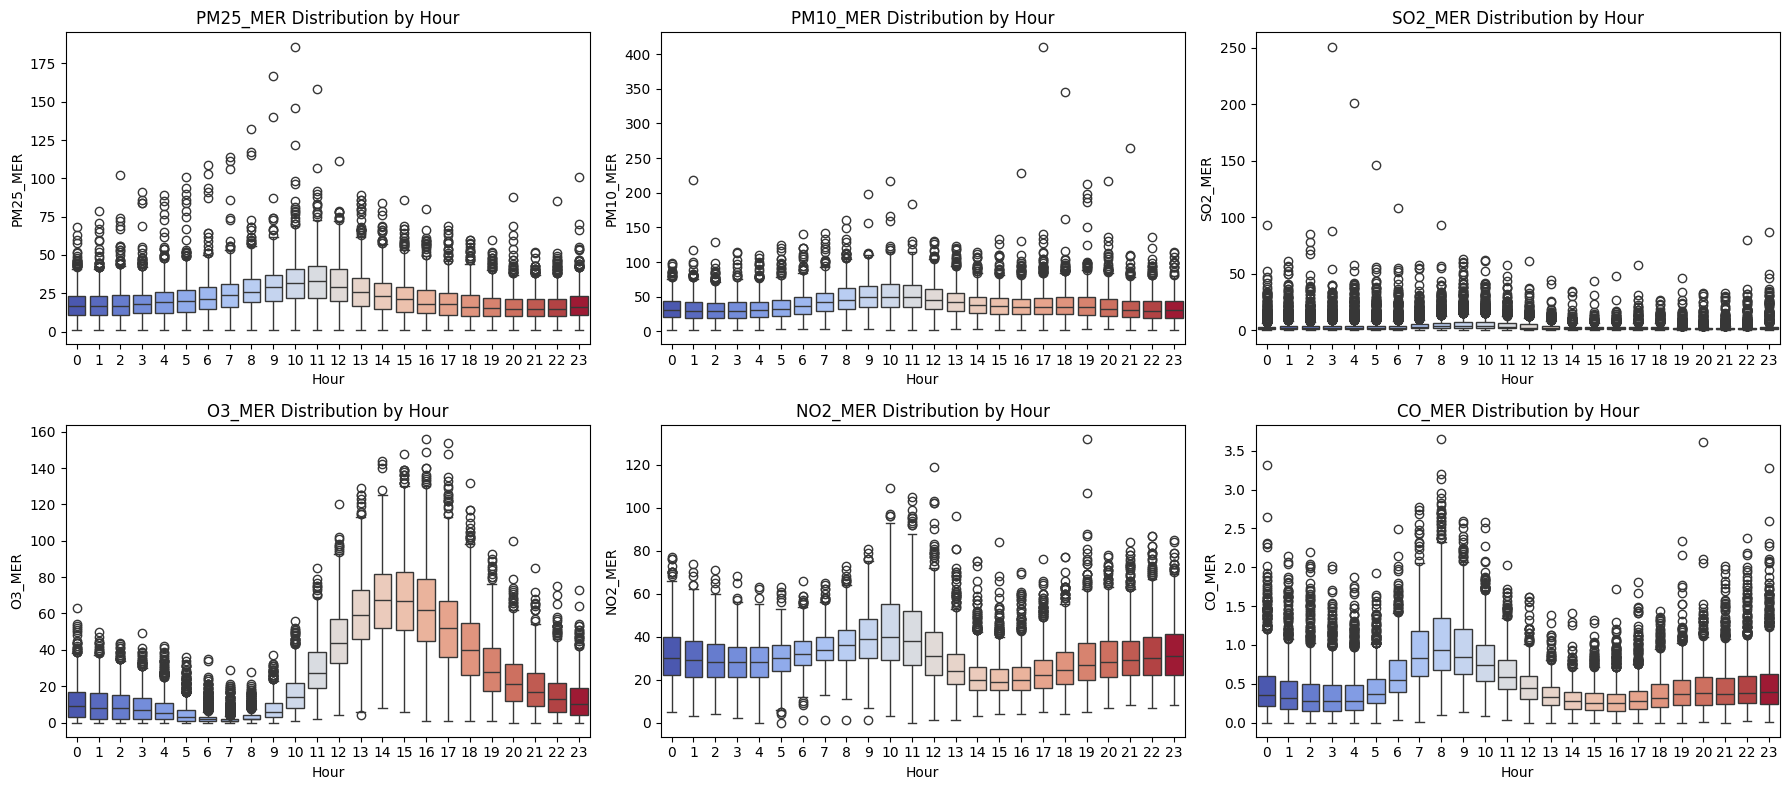

In [122]:
# Plotting boxplots comparing pollution levels by hour
plt.figure(figsize=(18, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='hour', y=pollutant, data=df, hue='hour', palette='coolwarm', legend=False)
    plt.title(f'{pollutant} Distribution by Hour')
    plt.xlabel('Hour')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

**Analysis from the Boxplot**
- Particulate Matter (PM2.5 and PM10) show higher levels in the early morning hours (around 7-10 AM), with noticeable peaks during these hours, especially on PM10. PM10 typically remains elevated throughout the day whereas PM2.5 may show a slight decrease in the afternoon.
- SO2 (Sulfur Dioxide) levels have some fluctuations, but they are relatively stable with noticeable dips in the late evening hours. The highest levels are seen during the early morning, followed by a decrease.
- O3 levels are notably higher in the afternoon, with a significant rise in values observed around noon. The lowest levels are observed in the early morning hours.
- The noticeable peaks for NO2 are at 7-8 AM and somewhat at 2-3 PM.
- CO levels vary slightly across the day, with occasional spikes during the early morning hours.

       PM25_MER   PM10_MER   SO2_MER     O3_MER    NO2_MER    CO_MER
hour                                                                
0     17.954892  33.397154  3.553664  11.372972  31.671354  0.475914
1     17.878146  32.393304  3.895703  10.704208  30.092173  0.418380
2     18.564143  31.807674  4.083315   9.944939  28.963915  0.382881
3     19.066691  31.788278  4.212198   8.889402  28.166387  0.359500
4     19.906997  32.609086  4.238258   7.470001  28.204329  0.365680
5     20.792320  34.450269  4.125177   5.171082  30.001661  0.436645
6     22.417479  38.532221  4.314777   3.125336  32.721382  0.634864
7     24.428763  43.424087  4.638581   2.386518  34.691579  0.917731
8     26.792740  48.553670  5.812799   3.558412  36.802895  1.062812
9     29.140980  50.633289  6.629452   7.759670  39.804258  0.946152
10    32.238641  52.513852  5.979839  16.229652  42.891381  0.800624
11    33.045512  51.469665  5.030158  29.843209  40.558020  0.634539
12    30.635893  47.397196  3.9151

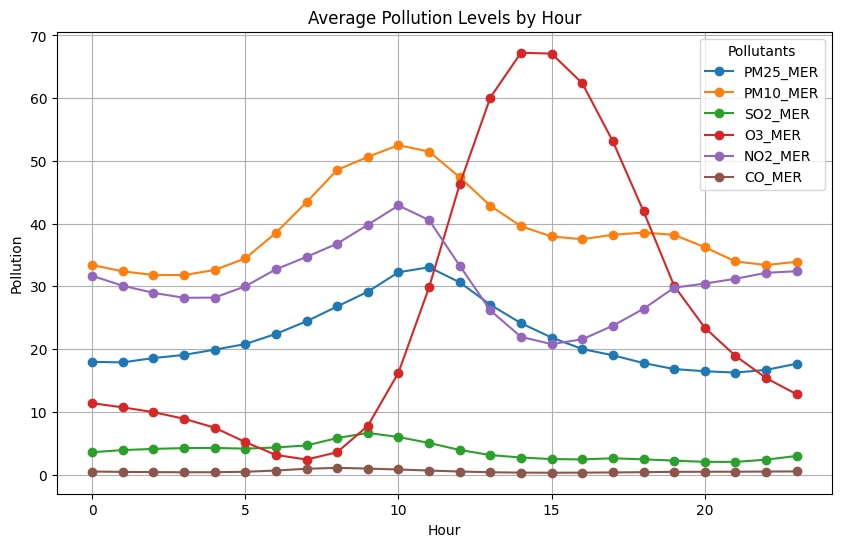

In [123]:
# Grouping by hour to calculate the average pollution levels for each hour
df_hourly_avg = df.groupby('hour')[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']].mean()
print(df_hourly_avg)
# Plotting the average pollution levels by hour
df_hourly_avg.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Pollution Levels by Hour')
plt.ylabel('Pollution')
plt.xlabel('Hour')
plt.legend(title='Pollutants')
plt.grid(True)
plt.show()

**Analysis**
- PM2.5 and PM10 pollutants show an overall increase in concentration from the early morning hours (like 4 AM) to the afternoon (around 8 AM to 9 AM) and then a gradual decrease in the later hours of the day. The peak pollution levels for these pollutants occur between 8 AM and 9 AM.
- SO2 pollutant tends to decrease gradually as the day progresses, with the highest concentrations at 8 AM and the lowest around 11 AM to 2 PM.
- O3 levels appear to increase as the day progresses, with a significant increase around 12 PM to 1 PM, peaking at 2 PM, and then gradually decreasing as the day moves into the evening hours.
- NO2 levels exhibit a steady increase in the early morning, reaching a peak around 8 AM. After the peak, the levels show a gradual decline throughout the day and remain relatively lower in the evening and night hours.
- CO levels are relatively stable but show slight fluctuations. There's a noticeable increase around 8 AM and 9 AM, after which levels drop slightly and remain consistent until later in the evening.

day_of_week
Tuesday      3863
Wednesday    3841
Saturday     3839
Monday       3839
Thursday     3817
Sunday       3795
Friday       3794
Name: count, dtype: int64


<Axes: title={'center': 'Frequency by Day of the Week'}, xlabel='day_of_week'>

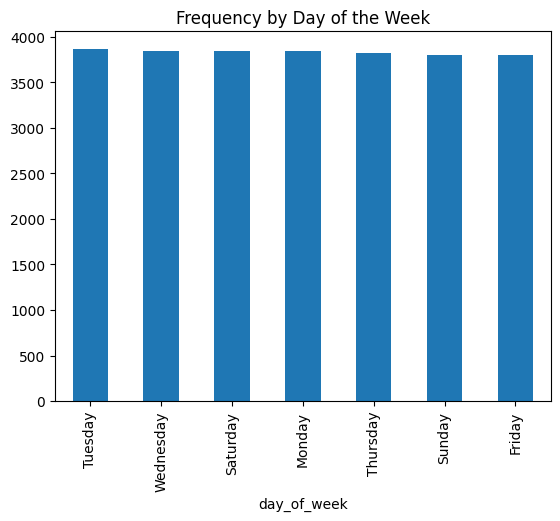

In [124]:
#By Day of the Week
day_counts = df['day_of_week'].value_counts()
print(day_counts)
day_counts.plot(kind='bar', title='Frequency by Day of the Week')

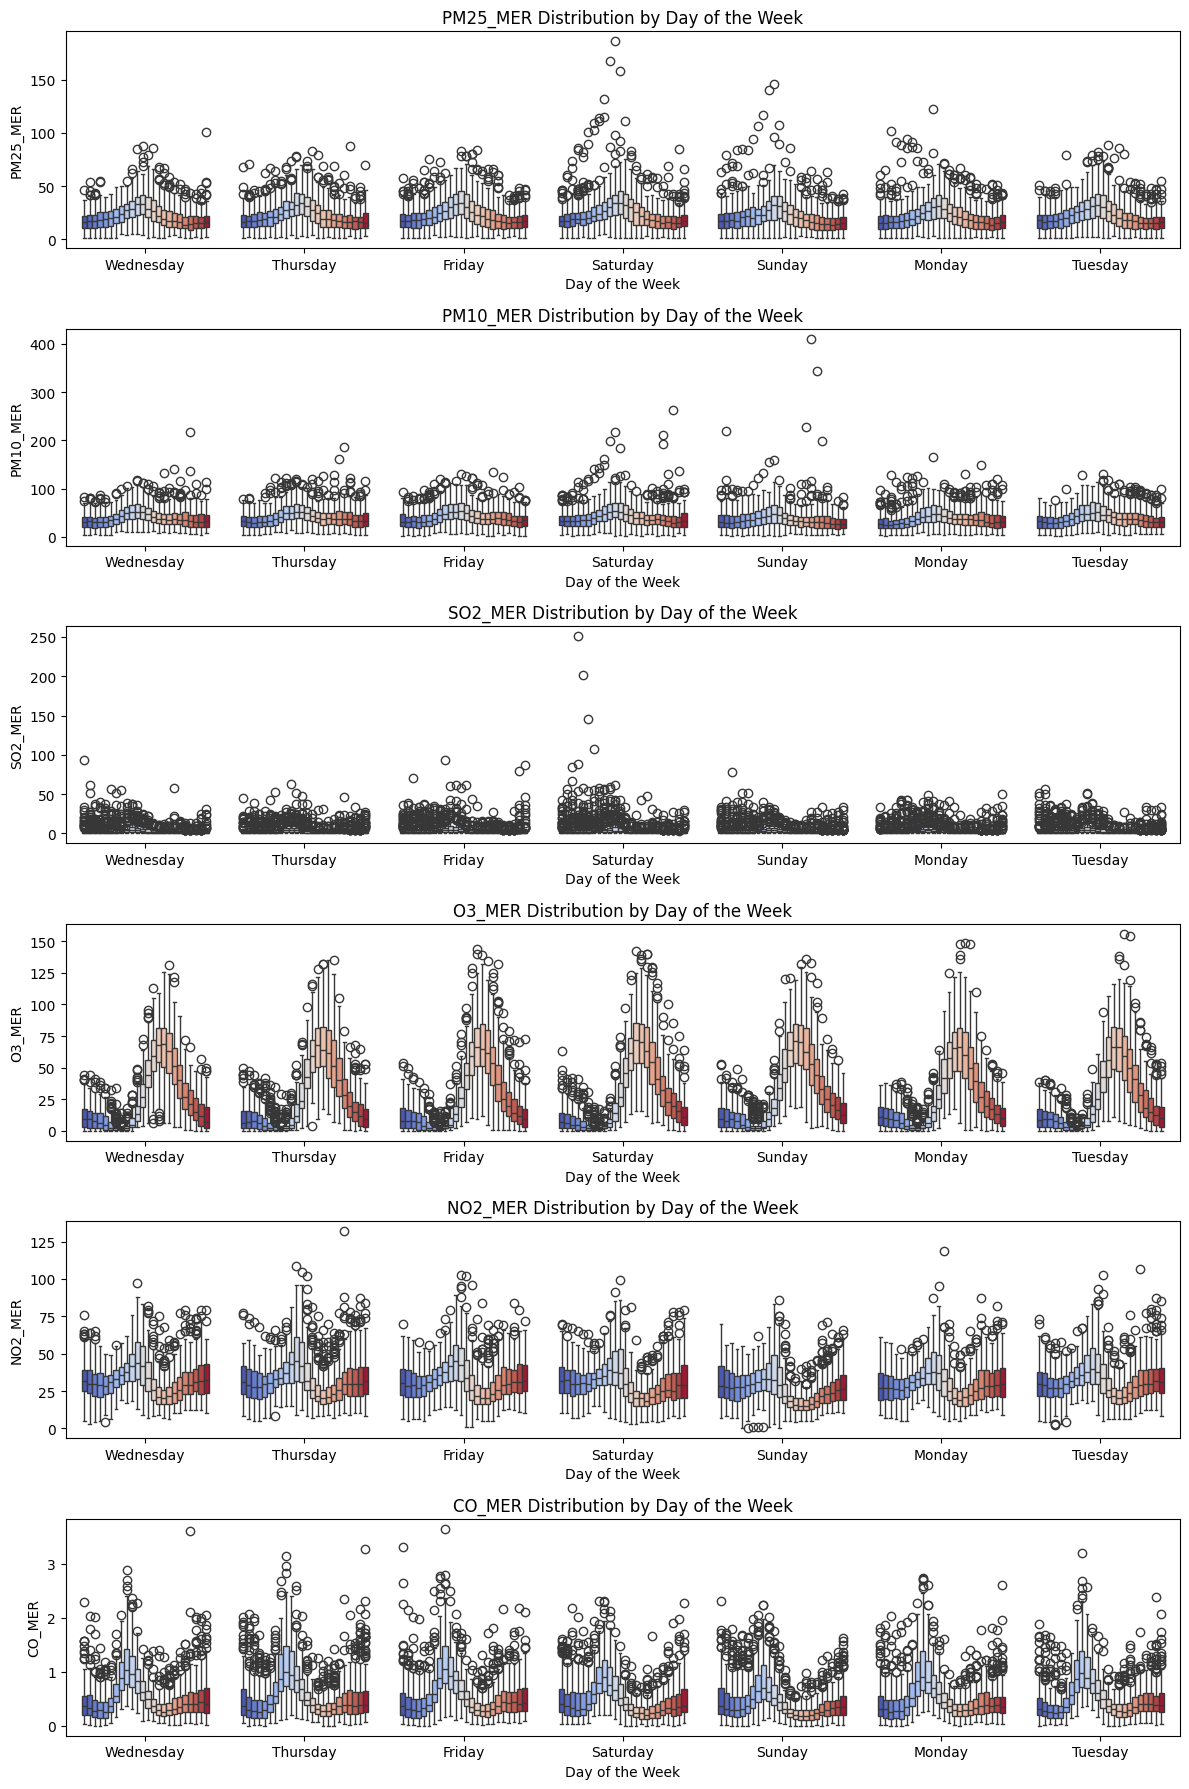

In [125]:
# Plotting boxplots comparing pollution levels by day of the week
plt.figure(figsize=(12, 18))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x='day_of_week', y=pollutant, data=df, hue='hour', palette='coolwarm', legend=False)
    plt.title(f'{pollutant} Distribution by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

**Analysis**
- For PM2.5, the distributionshows moderate variation across the days of the week. Weekdays, especially Thursday and Friday, exhibit slightly higher median and maximum values compared to the weekend (Sunday). Outliers are present throughout the week, with some extreme pollution events on Saturday.
- PM10 levels are consistently higher than PM2.5, with a similar trend of slightly higher weekday values. Outliers are significantly more frequent, particularly on Saturday.
- SO2 levels are generally low, with minimal day-to-day variation and the overall median values are stable across the week. Some outliers are observed, especially on Saturday. 
- O3 levels exhibit a clear increase during the weekends, particularly on Sunday, also, higher variability is observed during weekdays, with significant peaks and dips. The highest outliers are visible on weekends.
- NO2 levels are higher during weekdays, particularly on Thursday and Friday. A noticeable drop in levels occurs on Sunday, with reduced median and fewer outliers, aligning with lower activity on weekends. Additionally, weekday outliers are prominent.
- CO levels remain low throughout the week, with minimal day-to-day variation. A slight increase in variability and outliers is observed during Thursday and Friday whereas Sunday shows the lowest levels.


              PM25_MER   PM10_MER   SO2_MER     O3_MER    NO2_MER    CO_MER
day_of_week                                                                
Friday       22.571994  40.733853  3.947233  25.215255  32.045944  0.543647
Monday       20.982021  37.314972  3.377814  24.971976  29.858109  0.498510
Saturday     23.178242  40.629157  4.264085  26.335979  30.299335  0.484186
Sunday       20.982949  36.002429  3.538359  27.995103  26.281837  0.424565
Thursday     22.434632  40.710986  3.451986  25.252636  32.370227  0.549758
Tuesday      21.633079  39.003047  3.527855  24.495882  31.169695  0.508563
Wednesday    21.787718  39.569584  3.470762  25.167125  32.155390  0.532322


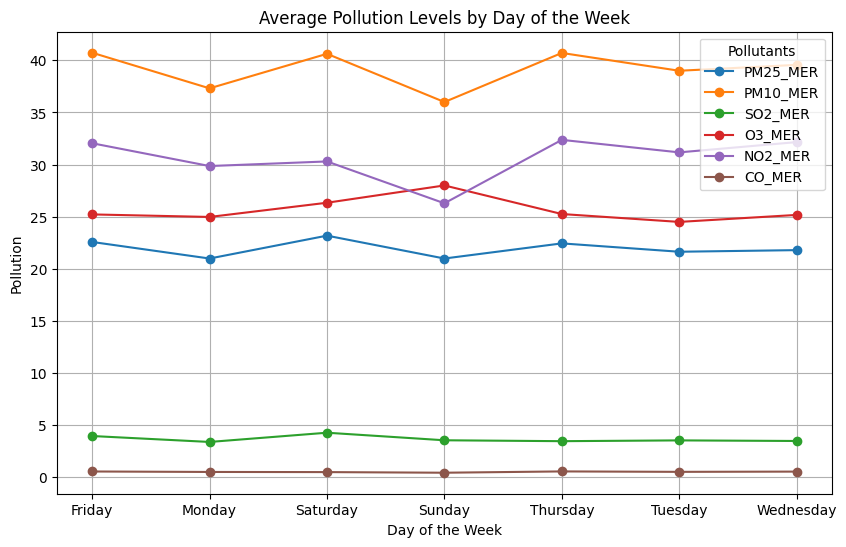

In [126]:
# Grouping by day of the week to calculate the average pollution levels for each day
df_weekly_avg = df.groupby('day_of_week')[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']].mean()
print(df_weekly_avg)
# Plotting the average pollution levels by day of the week
df_weekly_avg.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Pollution Levels by Day of the Week')
plt.ylabel('Pollution')
plt.xlabel('Day of the Week')
plt.legend(title='Pollutants')
plt.grid(True)
plt.show()

**Analysis**
- PM10 consistently shows higher values than PM2.5 throughout the week. 
- PM10 levels are highest on Friday (40.73) and Saturday (40.63) and lowest on Sunday (36.00), followed by Monday (37.31).
- O3 levels peak on Sunday, while most pollutants (PM2.5, PM10, NO2, and CO) show a decline on Sunday.
- Weekdays, especially Friday and Thursday, tend to have higher levels of PM10, NO2, and CO.

month
12    2812
11    2279
5     2232
3     2232
10    2232
8     2232
1     2185
7     2184
9     2160
6     2160
4     2136
2     1944
Name: count, dtype: int64


<Axes: title={'center': 'Frequency by Month'}, xlabel='month'>

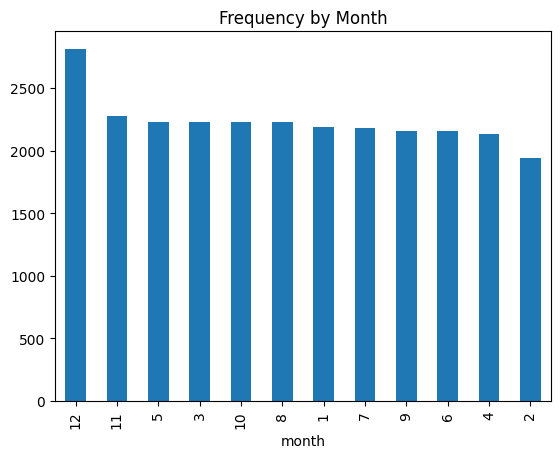

In [127]:
#By Month
month_counts = df['month'].value_counts()
print(month_counts)
month_counts.plot(kind='bar', title='Frequency by Month')

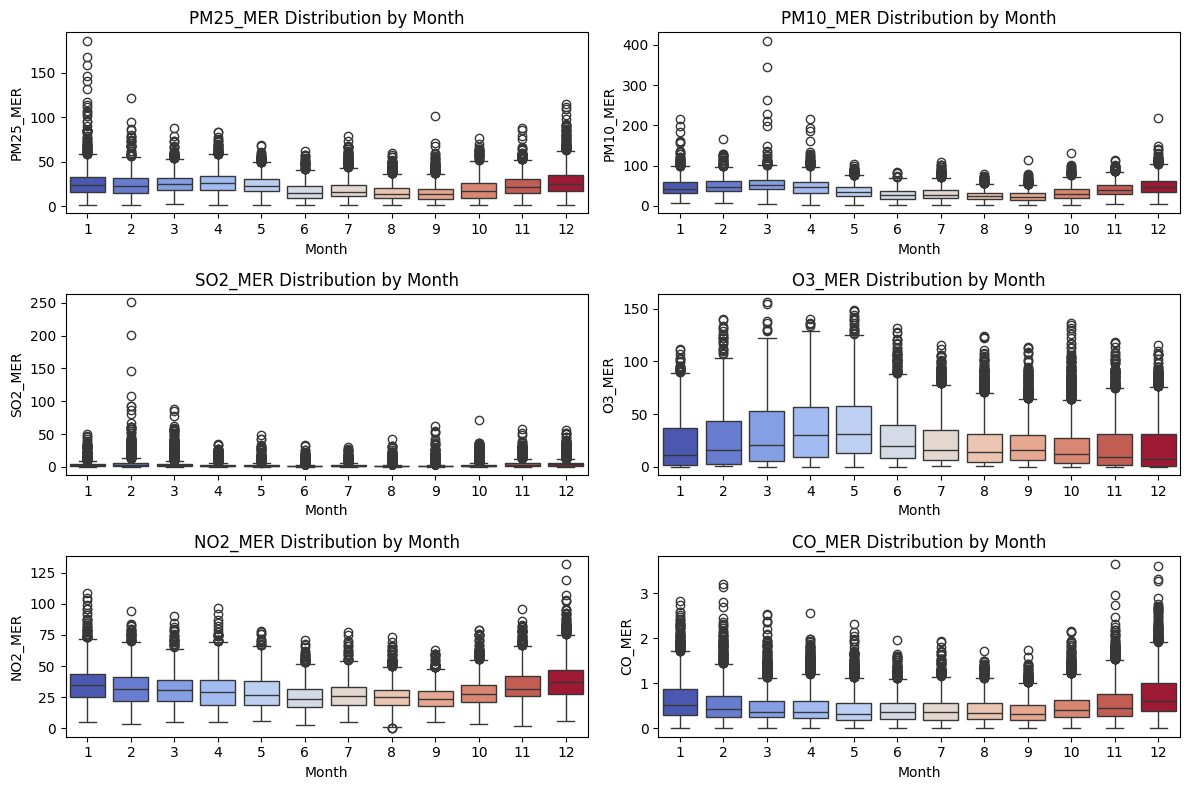

In [128]:
# Plotting boxplots comparing pollution levels by month
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='month', y=pollutant, data=df, hue='month', palette='coolwarm', legend=False)
    plt.title(f'{pollutant} Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

**Analysis**
- For PM2.5 seasonal variation is evident with higher median values in the winter months (December and January) and
outliers are present throughout the year, also lower pollution levels are seen during the summer months (June to August).
- PM10 shows the highest overall levels, with significant spikes in winter (December) and spring (March-April) and 
outliers are prominent in the plot.
- SO2 levels remain consistently low, with minimal seasonal variation with some outliers are present, especially in colder months.
- O3 levels are higher during spring and summer (April-May). The distribution is wider, with a relatively high number of outliers.
- CO levels remain consistently low throughout the year. Some outliers are observed in winter months.

        PM25_MER   PM10_MER   SO2_MER     O3_MER    NO2_MER    CO_MER
month                                                                
1      26.361256  46.793736  4.230549  21.814736  35.715527  0.652736
2      24.101830  49.391681  6.017843  26.363137  32.836430  0.549356
3      26.002576  54.238977  4.977221  31.849780  31.551467  0.480871
4      26.957782  47.973285  2.668398  36.646155  30.259490  0.475499
5      23.681732  37.045484  2.424876  37.625625  29.319108  0.412372
6      16.427585  28.002715  1.895284  27.097478  25.005228  0.423703
7      18.481322  31.332637  2.483850  24.611693  26.806424  0.417601
8      15.509936  26.193128  2.193520  22.432978  25.940510  0.416134
9      15.211343  24.477754  2.627469  22.225945  24.884365  0.384279
10     18.697025  30.982256  3.330281  20.878006  29.016558  0.488951
11     23.095478  41.881865  5.044341  19.683601  34.567537  0.573191
12     27.407384  49.473054  5.581077  18.664000  38.983167  0.734976


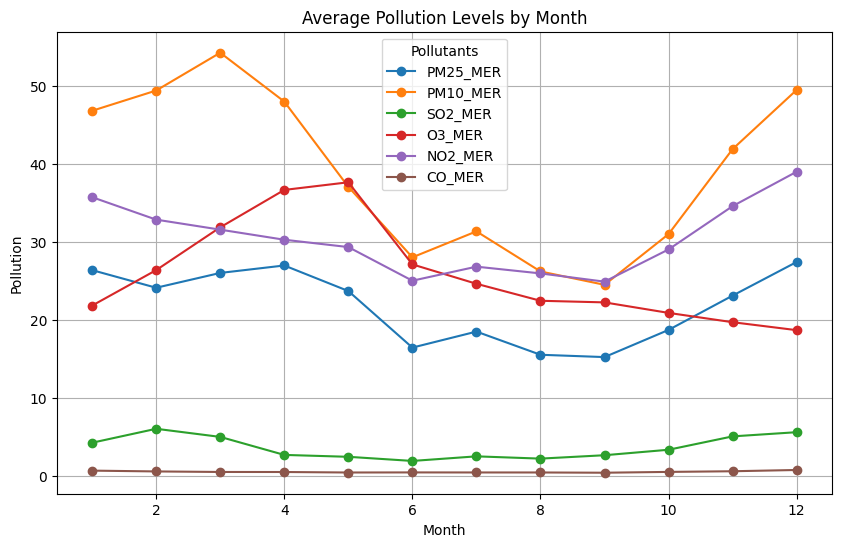

In [129]:
# Grouping by month to calculate the average pollution levels for each month
df_monthly_avg = df.groupby('month')[['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']].mean()
print(df_monthly_avg)
# Plotting the average pollution levels by month
df_monthly_avg.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Pollution Levels by Month')
plt.ylabel('Pollution')
plt.xlabel('Month')
plt.legend(title='Pollutants')
plt.grid(True)
plt.show()

**Analysis**
- PM10 exhibits the highest values throughout the year. Peaks during March (54.2) and April (47.9), then drops significantly by June (28.0), remaining low through September. There is another rise starts in October, with a peak in December (49.5).
- PM2.5 follows a similar seasonal trend as PM10 but with consistently lower values. Peaks in December (27.4) and drops to its lowest in August (15.5).
- NO2 shows a decreasing trend from January (35.7) to June (25.0). A slight rise is observed after September, peaking again in December (39.0).
- O3 has a relatively flat trend but peaks in May (37.6). Drops significantly after May, stabilizing around 18-24 for the latter months.
- SO2 has the lowest pollution levels among all pollutants which peaks in February (6.0) and November (5.0) and remains low during other months, reaching its lowest in June (1.9).
- CO consistently shows very low levels throughout the year, remaining below 1 and peaks slightly in December (0.73) and January (0.65).